### Саркисян Артем Оганнесович НПМ-01-22

## 1 Задание

Матрица ковариации для повернутых данных: [[0.12505466 0.11644052]
 [0.11644052 0.12649941]]


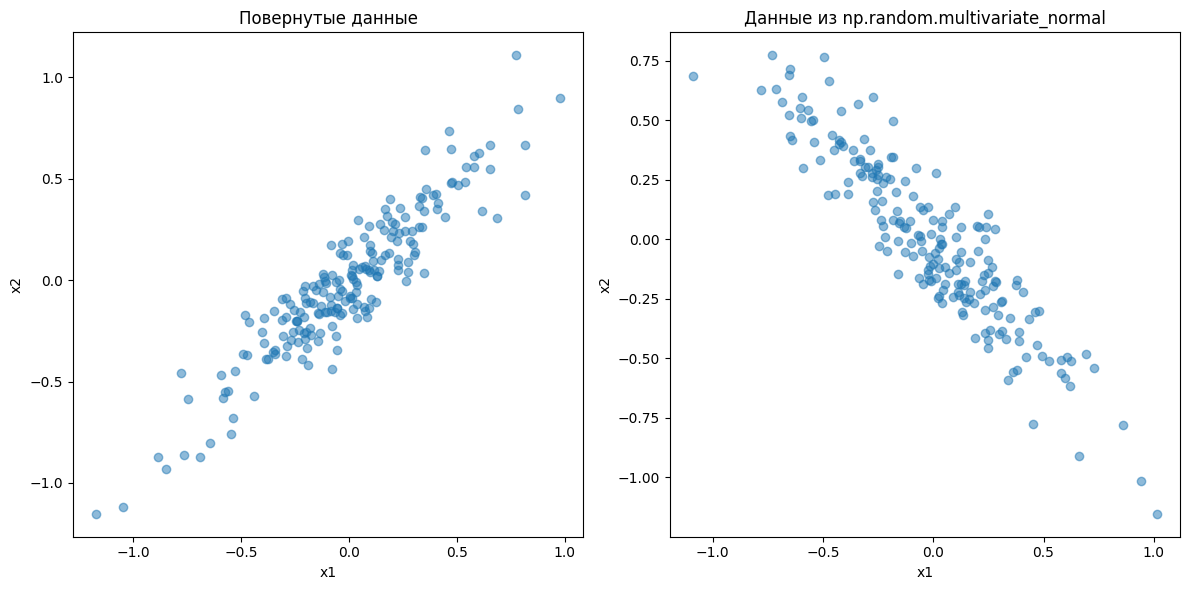

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
M = 200
sigma1 = 0.1
sigma2 = 0.5
alpha = np.pi / 4

# Генерация данных
x1 = np.random.normal(0, sigma1, M)
x2 = np.random.normal(0, sigma2, M)
X = np.column_stack((x1, x2))

# Матрица поворота
R = np.array([[np.cos(alpha), -np.sin(alpha)],
              [np.sin(alpha), np.cos(alpha)]])

# Поворот данных
X_rotated = X @ R

# Расчет матрицы ковариации
cov_matrix = np.cov(X_rotated, rowvar=False)
print(f"Матрица ковариации для повернутых данных: {cov_matrix}")

# Облако точек с помощью многомерного нормального распределения
mean = [0, 0]
cov = R @ np.diag([sigma1**2, sigma2**2]) @ R.T
X_multivariate = np.random.multivariate_normal(mean, cov, M)

# Визуализация
plt.figure(figsize=(12, 6))

# График для повернутых данных
plt.subplot(1, 2, 1)
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], alpha=0.5)
plt.title("Повернутые данные")
plt.xlabel("x1")
plt.ylabel("x2")

# График для облака точек из многомерного нормального распределения
plt.subplot(1, 2, 2)
plt.scatter(X_multivariate[:, 0], X_multivariate[:, 1], alpha=0.5)
plt.title("Данные из np.random.multivariate_normal")
plt.xlabel("x1")
plt.ylabel("x2")

plt.tight_layout()
plt.show()


Код генерирует два набора данных с нормальным распределением, поворачивает их на 45 градусов и вычисляет матрицу ковариации. Это позволяет визуализировать различия в распределении точек до и после поворота, а также при использовании многомерного нормального распределения. Результаты помогают понять структуру данных и их корреляции.

## 2 Задание

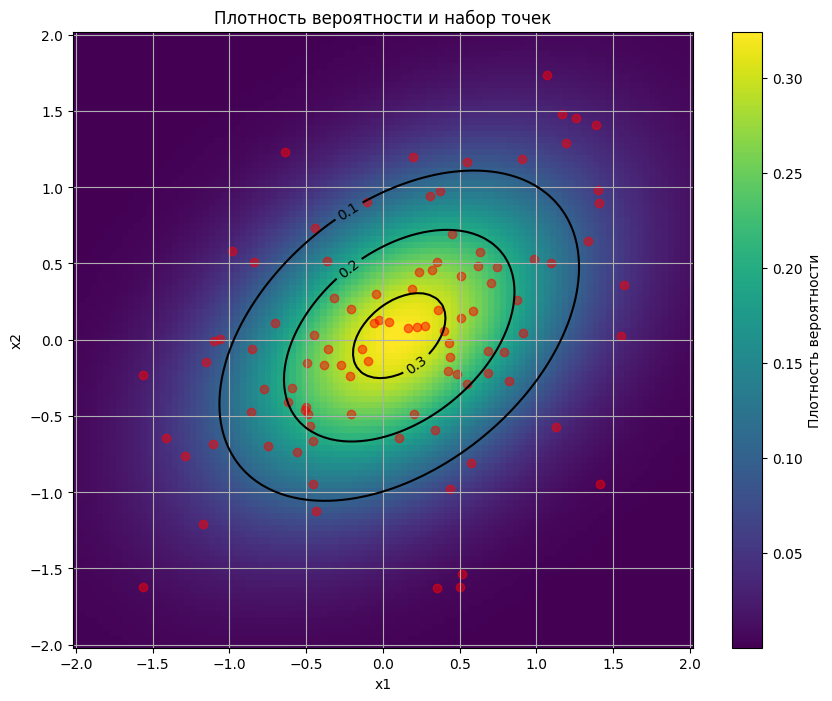

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Генерация данных с многомерным нормальным распределением
mean = [0, 0]
covariance = [[0.5, 0.2], [0.2, 0.5]]  # Пример матрицы ковариации
X_multivariate = np.random.multivariate_normal(mean, covariance, size=100)

# Расчет среднего значения и матрицы ковариации
mu = np.mean(X_multivariate, axis=0)
cov = np.cov(X_multivariate, rowvar=False)

# Создание сетки для вычисления плотности вероятности
xx = np.linspace(-2, 2, 100)
yy = np.linspace(-2, 2, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.column_stack((XX.ravel(), YY.ravel()))

# Создание объекта многомерного нормального распределения
mvn = multivariate_normal(mean=mu, cov=cov)

# Вычисление плотности вероятности
ZZ = mvn.pdf(pp).reshape(XX.shape)

# Визуализация
plt.figure(figsize=(10, 8))
plt.pcolor(XX, YY, ZZ, shading='auto', cmap='viridis')
plt.colorbar(label='Плотность вероятности')
contours = plt.contour(XX, YY, ZZ, levels=[0.1, 0.2, 0.3, 0.4, 0.5], colors='black')
plt.clabel(contours, inline=True, fontsize=10)
plt.scatter(X_multivariate[:, 0], X_multivariate[:, 1], color='red', alpha=0.5)
plt.title("Плотность вероятности и набор точек")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


Даннный код генерирует данные на основе многомерного нормального распределения, вычисляет их средние значения и матрицу ковариации, а затем визуализирует плотность вероятности с помощью контурного графика. Это позволяет оценить распределение данных и их взаимосвязи, что полезно в статистическом анализе и машинном обучении.

## 3 Задание

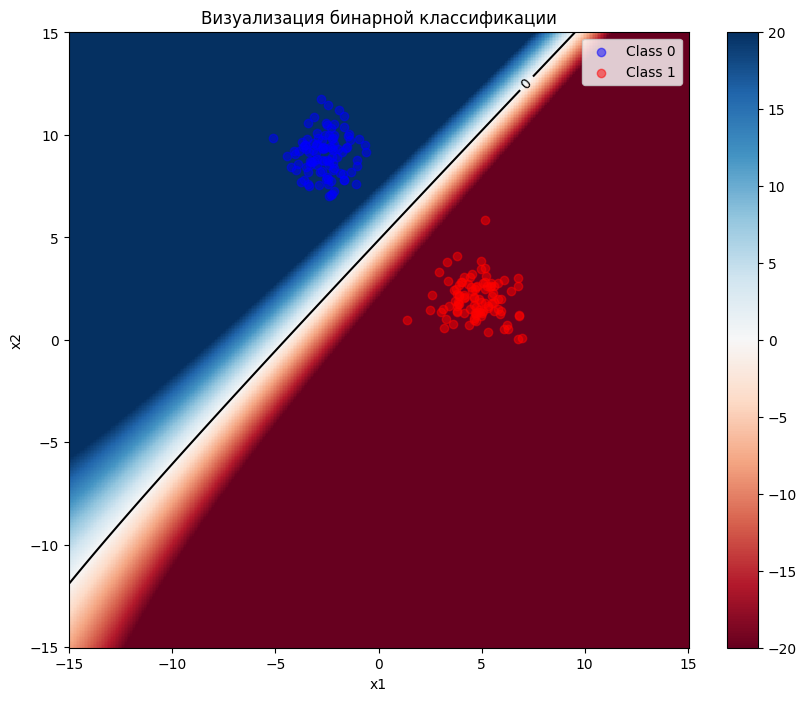

In [5]:
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal

# Генерация данных
X, y = make_blobs(n_samples=200, n_features=2, centers=2, random_state=42)

# Разделение данных на классы
X0 = X[y == 0]
X1 = X[y == 1]

# Расчет средних значений и матриц ковариации
mu0 = np.mean(X0, axis=0)
mu1 = np.mean(X1, axis=0)
C0 = np.cov(X0, rowvar=False)
C1 = np.cov(X1, rowvar=False)

# Априорные вероятности
M = len(X)
p0 = len(X0) / M
p1 = len(X1) / M

# Создание сетки для визуализации
xx = np.linspace(-15, 15, 400)
yy = np.linspace(-15, 15, 400)
XX, YY = np.meshgrid(xx, yy)
pp = np.column_stack((XX.ravel(), YY.ravel()))

# Расчет правдоподобий
m0 = multivariate_normal(mean=mu0, cov=C0)
m1 = multivariate_normal(mean=mu1, cov=C1)
p_x_given_y0 = m0.pdf(pp)
p_x_given_y1 = m1.pdf(pp)

# Расчет разности логарифмов правдоподобий
log_ratio = np.log(p_x_given_y0 * p0) - np.log(p_x_given_y1 * p1)
log_ratio = log_ratio.reshape(XX.shape)

# Визуализация
plt.figure(figsize=(10, 8))
IMG = plt.pcolor(XX, YY, log_ratio, shading='auto', cmap='RdBu', vmin=-20, vmax=20)
plt.colorbar(IMG)
CS = plt.contour(XX, YY, log_ratio, levels=[0], colors='k')
plt.clabel(CS, inline=1, fontsize=10)
plt.scatter(X0[:, 0], X0[:, 1], color='blue', alpha=0.5, label='Class 0')
plt.scatter(X1[:, 0], X1[:, 1], color='red', alpha=0.5, label='Class 1')
plt.title("Визуализация бинарной классификации")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


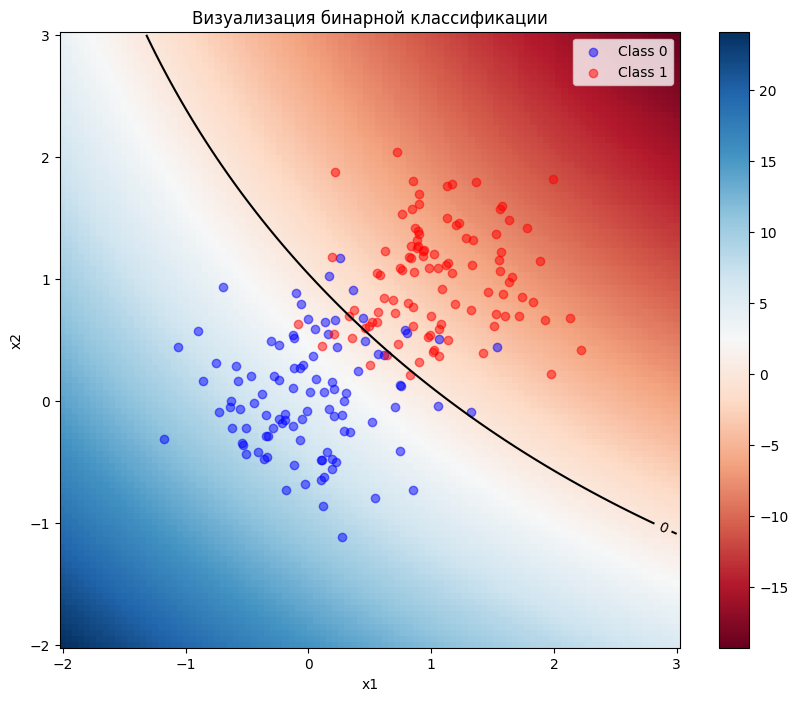

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Параметры
M = 200  # Общее количество точек
class_ratio = 0.5
sigma1 = 0.5
sigma2 = 0.5
R = np.array([[1, 0], [0, 1]])  # Матрица вращения (можно изменить)

# Генерация данных для класса 0
M0 = int(M * class_ratio)
mean0 = [0, 0]
cov0 = np.dot(np.dot(R, np.array([[sigma1**2, 0], [0, sigma2**2]])), R.T)
X0 = np.random.multivariate_normal(mean0, cov0, M0)
y0 = np.zeros(M0)

# Генерация данных для класса 1
M1 = M - M0
mean1 = [1, 1]
cov1 = np.dot(np.dot(R, np.array([[sigma2**2, 0], [0, sigma1**2]])), R.T)
X1 = np.random.multivariate_normal(mean1, cov1, M1)
y1 = np.ones(M1)

# Объединение данных
X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

# Расчет средних значений и матриц ковариации
mu0 = np.mean(X0, axis=0)
mu1 = np.mean(X1, axis=0)
C0 = np.cov(X0, rowvar=False)
C1 = np.cov(X1, rowvar=False)

# Априорные вероятности
p0 = M0 / M
p1 = M1 / M

# Создание сетки для визуализации
xx = np.linspace(-2, 3, 100)
yy = np.linspace(-2, 3, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)

# Расчет вероятностей
p_x_given_y0 = multivariate_normal.pdf(pp, mean=mu0, cov=C0)
p_x_given_y1 = multivariate_normal.pdf(pp, mean=mu1, cov=C1)

# Расчет разности логарифмов правдоподобий
log_ratio = np.log(p_x_given_y0 * p0) - np.log(p_x_given_y1 * p1)
log_ratio = log_ratio.reshape(XX.shape)

# Визуализация
plt.figure(figsize=(10, 8))
IMG = plt.pcolor(XX, YY, log_ratio, shading='auto', cmap='RdBu')
plt.colorbar(IMG)
CS = plt.contour(XX, YY, log_ratio, levels=[0], colors='k')
plt.clabel(CS, inline=1, fontsize=10)
plt.scatter(X0[:, 0], X0[:, 1], color='blue', alpha=0.5, label='Class 0')
plt.scatter(X1[:, 0], X1[:, 1], color='red', alpha=0.5, label='Class 1')
plt.title("Визуализация бинарной классификации")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


## 4 Задание 

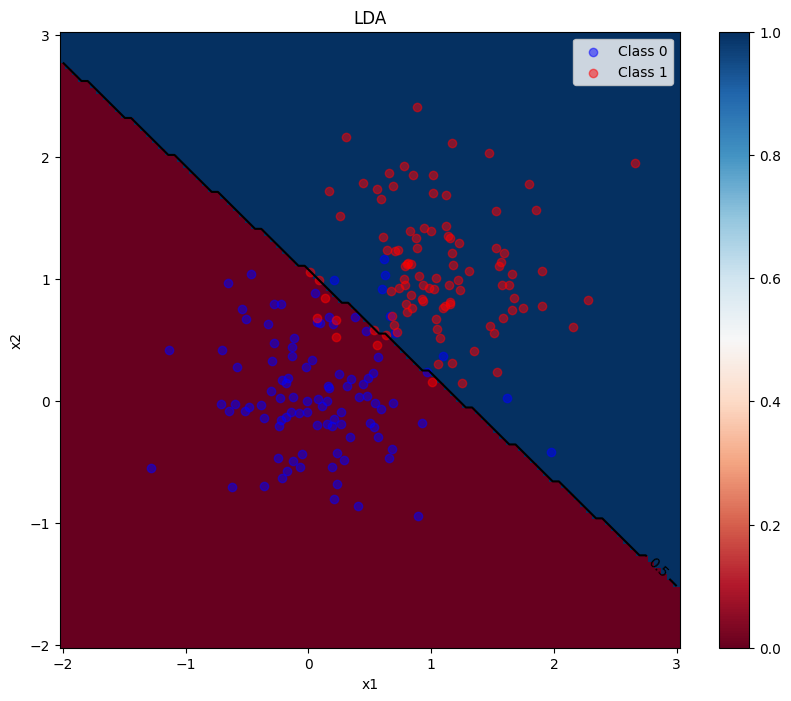

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin

# Генерация данных
M = 200
class_ratio = 0.5
sigma1 = 0.5
sigma2 = 0.5

# Генерация данных для класса 0
M0 = int(M * class_ratio)
mean0 = [0, 0]
cov0 = np.array([[sigma1**2, 0], [0, sigma2**2]])
X0 = np.random.multivariate_normal(mean0, cov0, M0)
y0 = np.zeros(M0)

# Генерация данных для класса 1
M1 = M - M0
mean1 = [1, 1]
cov1 = np.array([[sigma2**2, 0], [0, sigma1**2]])
X1 = np.random.multivariate_normal(mean1, cov1, M1)
y1 = np.ones(M1)

# Объединение данных
X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

# Реализация классификатора LDA
class MyLDA(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.mu0 = None
        self.mu1 = None
        self.C = None
        self.C_inv = None
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        X0 = X[y == 0]
        X1 = X[y == 1]
        
        self.mu0 = np.mean(X0, axis=0)
        self.mu1 = np.mean(X1, axis=0)
        
        C0 = np.cov(X0, rowvar=False)
        C1 = np.cov(X1, rowvar=False)
        self.C = (C0 + C1) / 2
        self.C_inv = np.linalg.inv(self.C)
        
        self.w = np.dot(self.C_inv, self.mu1 - self.mu0)
        self.b = -0.5 * np.dot(np.dot(self.mu1 - self.mu0, self.C_inv), self.mu1 + self.mu0)
    
    def predict(self, X):
        return (np.dot(X, self.w) + self.b) > 0

# Обучение модели LDA
lda = MyLDA()
lda.fit(X, y)

# Создание сетки для визуализации
xx = np.linspace(-2, 3, 100)
yy = np.linspace(-2, 3, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)

# Прогнозирование классов для сетки
ZZ = lda.predict(pp).reshape(XX.shape)

# Визуализация результатов
plt.figure(figsize=(10, 8))
IMG = plt.pcolor(XX, YY, ZZ, shading='auto', cmap='RdBu')
plt.colorbar(IMG)
CS = plt.contour(XX, YY, ZZ, levels=[0.5], colors='k')
plt.clabel(CS, inline=1, fontsize=10)
plt.scatter(X0[:, 0], X0[:, 1], color='blue', alpha=0.5, label='Class 0')
plt.scatter(X1[:, 0], X1[:, 1], color='red', alpha=0.5, label='Class 1')
plt.title("LDA")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


В этом коде реализован классификатор линейного дискриминантного анализа (LDA) с использованием пользовательского класса MyLDA. Данные для двух классов генерируются с помощью многомерного нормального распределения. Модель обучается на этих данных, вычисляя средние значения и ковариацию классов. Затем производится предсказание классов на сетке, что позволяет визуализировать разделяющую границу между классами. Результаты отображаются на графике, где видно, как LDA разделяет классы, а также исходные точки данных. Код демонстрирует основные шаги в реализации LDA и его применение к двум классам данных.

## 5 Задание

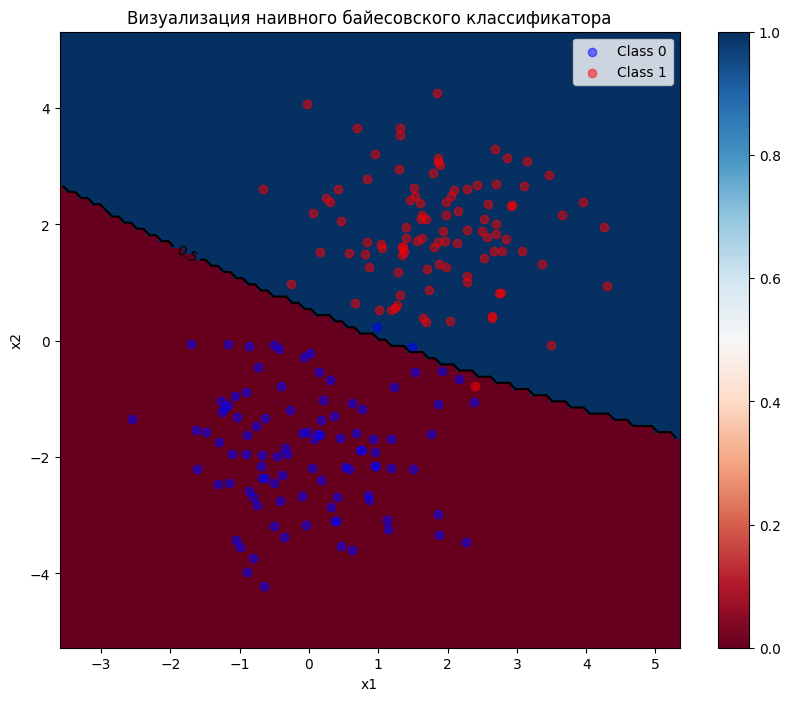

In [9]:
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.stats import norm

class MyNaiveBayes(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.class_priors = None
        self.means = None
        self.variances = None
        self.classes = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        self.class_priors = np.zeros(n_classes)
        self.means = np.zeros((n_classes, n_features))
        self.variances = np.zeros((n_classes, n_features))
        
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.class_priors[i] = len(X_c) / n_samples
            self.means[i, :] = np.mean(X_c, axis=0)
            self.variances[i, :] = np.var(X_c, axis=0)
    
    def predict(self, X):
        n_samples, n_features = X.shape
        n_classes = len(self.classes)
        
        posteriors = np.zeros((n_samples, n_classes))
        
        for i, c in enumerate(self.classes):
            prior = np.log(self.class_priors[i])
            likelihoods = norm.pdf(X, loc=self.means[i], scale=np.sqrt(self.variances[i]))
            posterior = prior + np.sum(np.log(likelihoods), axis=1)
            posteriors[:, i] = posterior
        
        return self.classes[np.argmax(posteriors, axis=1)]

# Генерация данных для примера
np.random.seed(0)
X0 = np.random.randn(100, 2) + np.array([0, -2])
X1 = np.random.randn(100, 2) + np.array([2, 2])
X = np.vstack((X0, X1))
y = np.array([0]*100 + [1]*100)

# Создание сетки для визуализации
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
XX, YY = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
pp = np.c_[XX.ravel(), YY.ravel()]

# Обучение классификатора и предсказание
nb = MyNaiveBayes()
nb.fit(X, y)
ZZ = nb.predict(pp).reshape(XX.shape)

# Визуализация результатов
plt.figure(figsize=(10, 8))
IMG = plt.pcolor(XX, YY, ZZ, shading='auto', cmap='RdBu')
plt.colorbar(IMG)
CS = plt.contour(XX, YY, ZZ, levels=[0.5], colors='k')
plt.clabel(CS, inline=1, fontsize=10)
plt.scatter(X0[:, 0], X0[:, 1], color='blue', alpha=0.5, label='Class 0')
plt.scatter(X1[:, 0], X1[:, 1], color='red', alpha=0.5, label='Class 1')
plt.title("Визуализация наивного байесовского классификатора")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()


В этом коде реализован наивный байесовский классификатор с использованием библиотеки numpy для обработки данных и matplotlib для визуализации результатов. Классификатор обучается на синтетических данных, состоящих из двух классов, и использует метод максимизации правдоподобия для оценки параметров каждого класса. После обучения производится предсказание на сетке значений, что позволяет визуализировать границу принятия решений между классами. Код демонстрирует простоту и эффективность наивного байесовского подхода в задачах классификации.

## 6 Задание

LDA:
Accuracy: 0.873333
Precision: 0.907143
Recall: 0.835526

Naive Bayes:
Accuracy: 0.870000
Precision: 0.924812
Recall: 0.809211



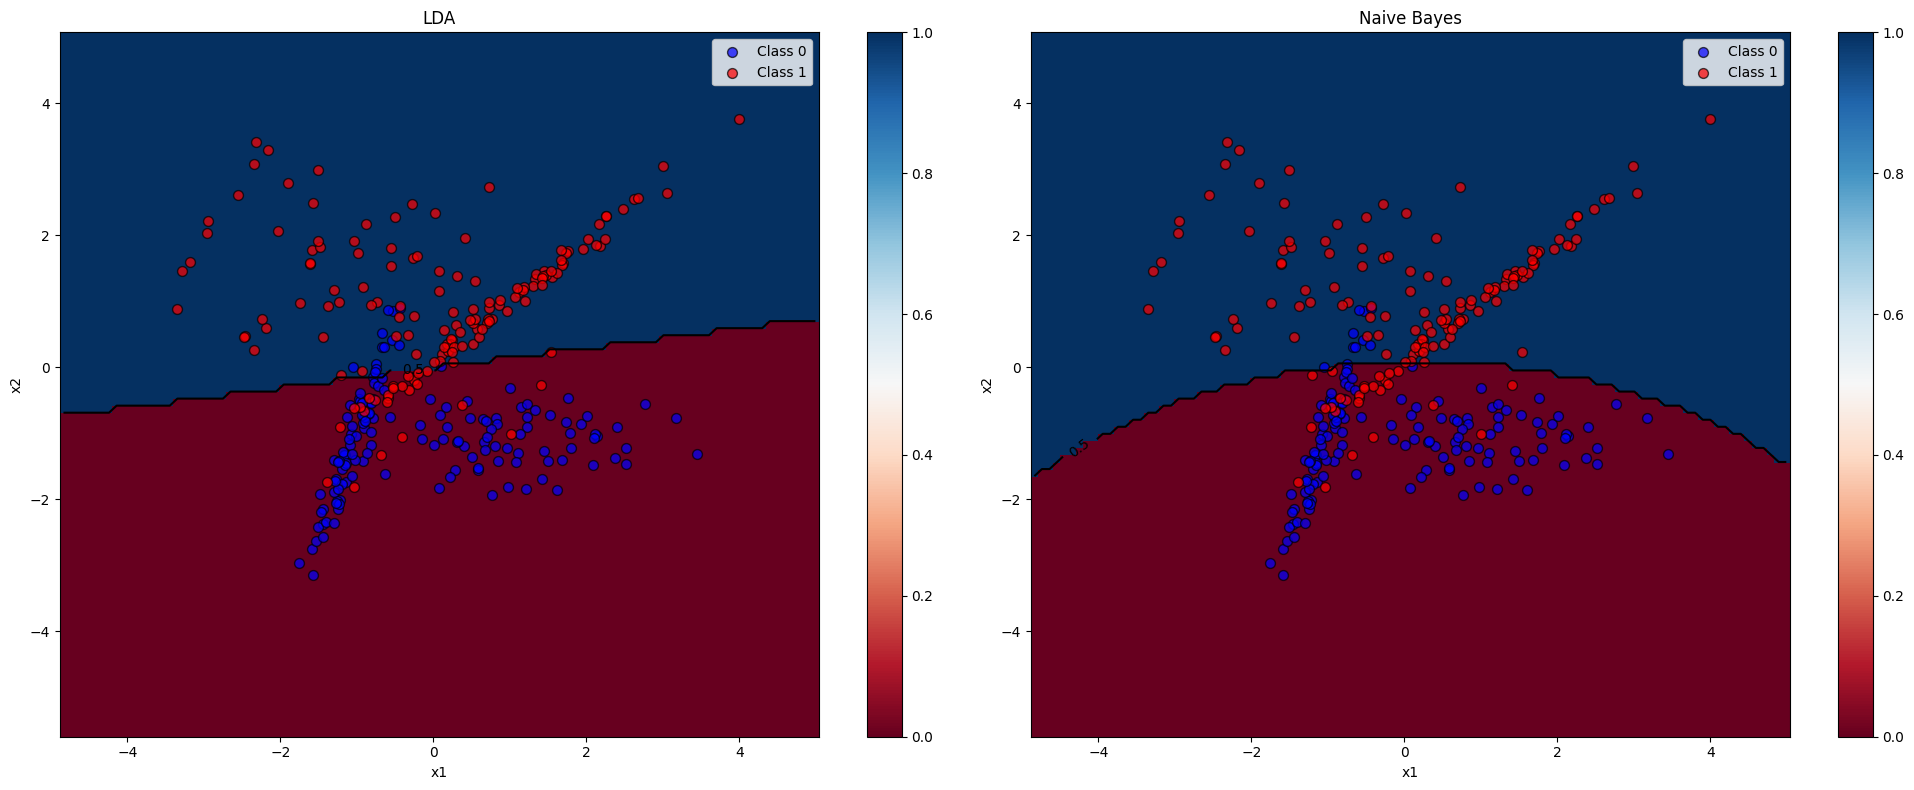

In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB

# Генерация синтетических данных
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение LDA
lda = LDA()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

# Обучение наивного байесовского классификатора
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Функция для подсчета метрик
def count_metrics():
    metrics = {
        'LDA': {
            'accuracy': accuracy_score(y_test, y_pred_lda),
            'precision': precision_score(y_test, y_pred_lda),
            'recall': recall_score(y_test, y_pred_lda)
        },
        'Naive Bayes': {
            'accuracy': accuracy_score(y_test, y_pred_nb),
            'precision': precision_score(y_test, y_pred_nb),
            'recall': recall_score(y_test, y_pred_nb)
        }
    }
    
    for model in metrics:
        print(f"{model}:")
        for metric in metrics[model]:
            print(f"{metric.capitalize()}: {metrics[model][metric]:.6f}")
        print()

count_metrics()

# Создание сетки для визуализации
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
pp = np.c_[xx.ravel(), yy.ravel()]

# Предсказание классов на сетке
ZZ_lda = lda.predict(pp).reshape(xx.shape)
ZZ_nb = nb.predict(pp).reshape(xx.shape)

# Функция для визуализации результатов
def plot_results():
    plt.figure(figsize=(20, 8))

    # Визуализация LDA
    plt.subplot(1, 2, 1)
    plt.pcolor(xx, yy, ZZ_lda, shading='auto', cmap='RdBu')
    plt.colorbar()
    CS_lda = plt.contour(xx, yy, ZZ_lda, levels=[0.5], colors='k')
    plt.clabel(CS_lda, inline=1, fontsize=10)
    plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='blue', edgecolor='black', s=50, alpha=0.7, label='Class 0')
    plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='red', edgecolor='black', s=50, alpha=0.7, label='Class 1')
    plt.title("LDA")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()

    # Визуализация Наивного Байеса
    plt.subplot(1, 2, 2)
    plt.pcolor(xx, yy, ZZ_nb, shading='auto', cmap='RdBu')
    plt.colorbar()
    CS_nb = plt.contour(xx, yy, ZZ_nb, levels=[0.5], colors='k')
    plt.clabel(CS_nb, inline=1, fontsize=10)
    plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='blue', edgecolor='black', s=50, alpha=0.7, label='Class 0')
    plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='red', edgecolor='black', s=50, alpha=0.7, label='Class 1')
    plt.title("Naive Bayes")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_results()


LDA:
Accuracy: 0.833333
Precision: 0.909091
Recall: 0.714286
nNaive Bayes:
Accuracy: 0.833333
Precision: 0.909091
Recall: 0.714286


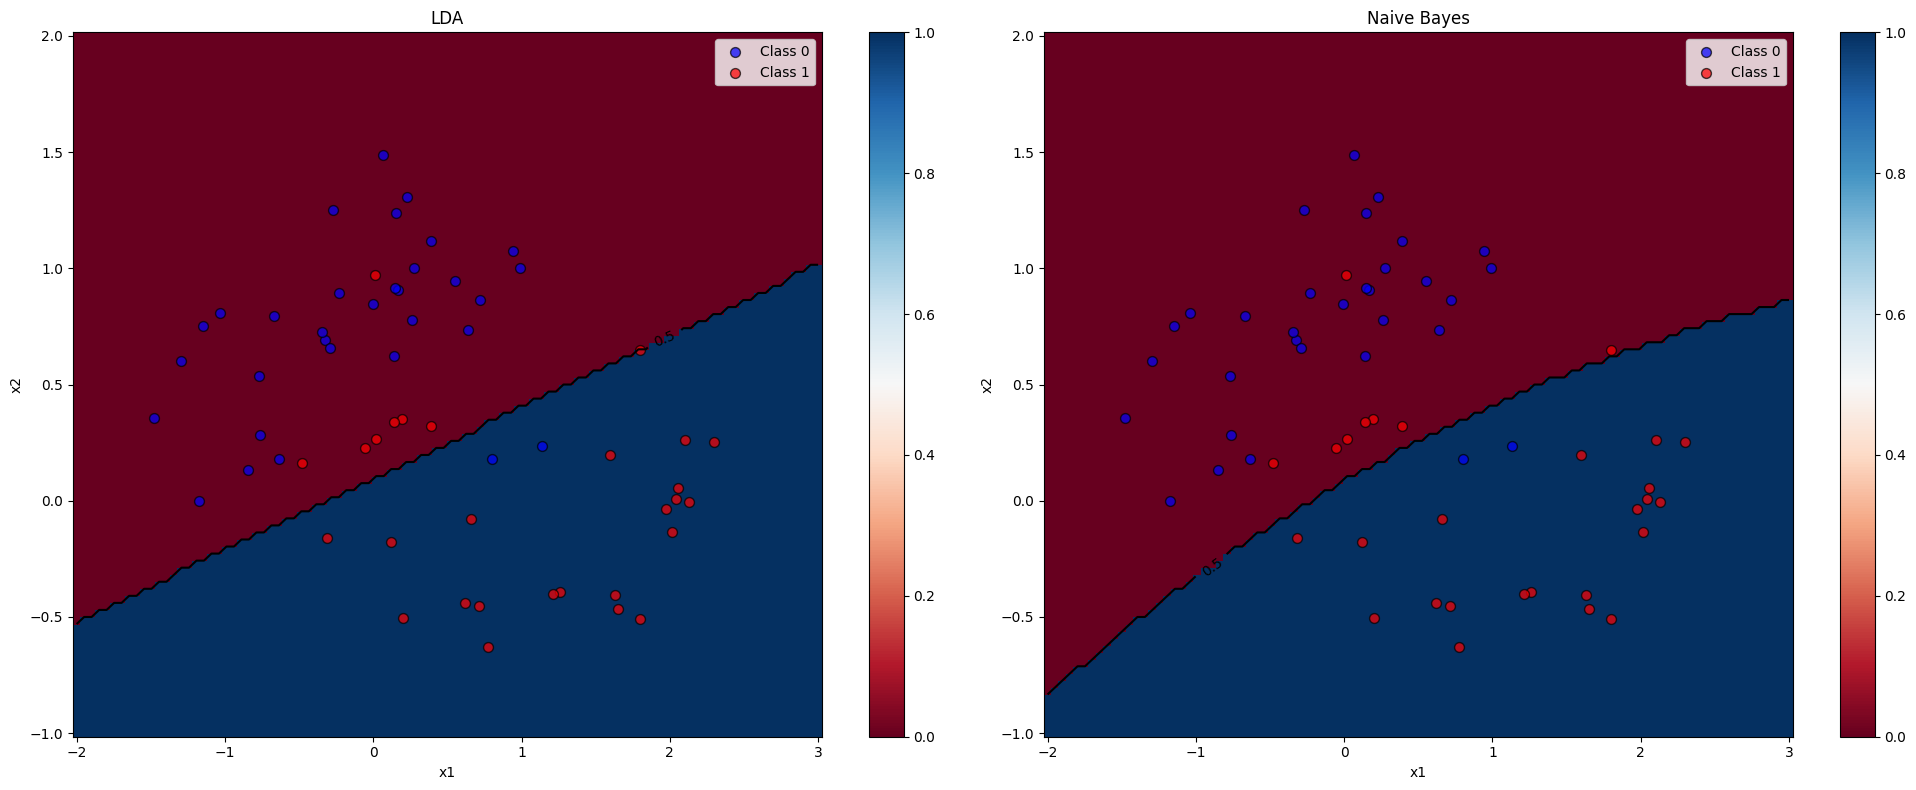

In [13]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB

# Генерация синтетических данных
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение LDA
lda = LDA()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

# Обучение наивного байесовского классификатора
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Подсчет метрик для LDA
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)

# Подсчет метрик для Наивного Байеса
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

# Вывод метрик
print("LDA:")
print(f"Accuracy: {accuracy_lda:.6f}")
print(f"Precision: {precision_lda:.6f}")
print(f"Recall: {recall_lda:.6f}")

print("nNaive Bayes:")
print(f"Accuracy: {accuracy_nb:.6f}")
print(f"Precision: {precision_nb:.6f}")
print(f"Recall: {recall_nb:.6f}")

# Создание сетки для визуализации
xx = np.linspace(-2, 3, 100)
yy = np.linspace(-1, 2, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)

# Предсказание классов на сетке
ZZ_lda = lda.predict(pp).reshape(XX.shape)
ZZ_nb = nb.predict(pp).reshape(XX.shape)

# Визуализация результатов
plt.figure(figsize=(20, 8))

# Визуализация LDA
plt.subplot(1, 2, 1)
IMG_lda = plt.pcolor(XX, YY, ZZ_lda, shading='auto', cmap='RdBu')
plt.colorbar(IMG_lda)
CS_lda = plt.contour(XX, YY, ZZ_lda, levels=[0.5], colors='k')
plt.clabel(CS_lda, inline=1, fontsize=10)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='blue', edgecolor='black', s=50, alpha=0.7, label='Class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='red', edgecolor='black', s=50, alpha=0.7, label='Class 1')
plt.title("LDA")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

# Визуализация Наивного Байеса
plt.subplot(1, 2, 2)
IMG_nb = plt.pcolor(XX, YY, ZZ_nb, shading='auto', cmap='RdBu')
plt.colorbar(IMG_nb)
CS_nb = plt.contour(XX, YY, ZZ_nb, levels=[0.5], colors='k')
plt.clabel(CS_nb, inline=1, fontsize=10)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='blue', edgecolor='black', s=50, alpha=0.7, label='Class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='red', edgecolor='black', s=50, alpha=0.7, label='Class 1')
plt.title("Naive Bayes")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

plt.tight_layout()
plt.show()


1. Линейный Дискриминантный Анализ (LDA):

   • LDA хорошо работает на линейно разделимых данных и предоставляет четкие границы принятия решений.

   • Визуализация показала, что LDA эффективно разделяет классы в синтетических данных, созданных с помощью make_moons.

2. Наивный Байесовский классификатор:

   • Этот метод основан на предположении о независимости признаков и показывает хорошие результаты даже при наличии шумов в данных.

   • Визуализация также продемонстрировала, что Наивный Байес способен разделять классы, хотя границы принятия решений могут быть менее четкими по сравнению с LDA.

Обе модели были оценены по метрикам точности, точности и полноты, что позволило сравнить их эффективность на тестовых данных. Выводы показывают, что выбор метода классификации может зависеть от структуры данных и специфики задачи.